In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('heart-disease-dataset.csv')
dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
print(len(dataset))
print(dataset.columns)

1190
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [5]:
df1 = dataset.drop('target',axis=1)
x = df1
y = dataset['target']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train)

952

In [7]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:

# Evaluate the model on the test set
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12)

cross_val_score(LogisticRegression(max_iter=2000), x, y, cv=cv)

array([0.85714286, 0.84033613, 0.81512605, 0.83193277, 0.79831933])

In [10]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

In [11]:
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(max_iter=2000),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l2']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [17,20, 25]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [12]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,logistic_regression,0.828571,"{'C': 1, 'penalty': 'l2'}"
1,lasso,0.179480,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.881513,"{'criterion': 'entropy', 'max_depth': 20}"


In [13]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(DecisionTreeClassifier(), x, y, cv=cv)

array([0.89915966, 0.86554622, 0.88235294, 0.89495798, 0.86554622])

In [14]:
import matplotlib.pyplot as plt 

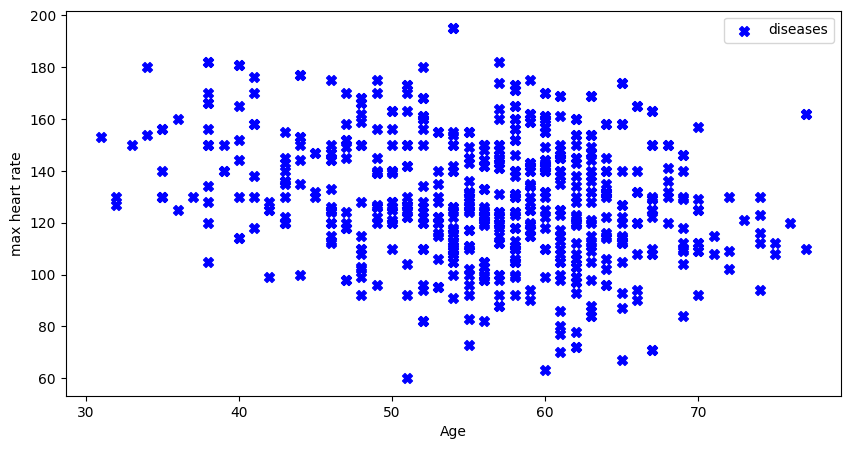

In [15]:
plt.rcParams['figure.figsize'] = (10,5)
df2 = dataset[dataset['target']==1]
plt.scatter(df2['age'],df2['max heart rate'],color='blue',marker='X',label='diseases',s=50)
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend()

In [16]:
dataset.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [17]:
dataset.rename(columns={'chest pain type': 'chest_pain_type','resting bp s':'resting_bp','fasting blood sugar':'blood_sugar','max heart rate':'max_heart_rate','resting ecg':'resting_ecg','exercise angina':'exercise_angina','ST slope':'ST_slope'}, inplace=True)

## DEFINING THE MODEL

In [18]:
dataset.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina',
       'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [19]:
df3 = dataset.drop('target',axis=1)
x = df3
y = dataset['target']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train)

952

# storing avg values of each column

In [21]:
dataset.describe()

,age,sex,chest_pain_type,resting_bp,cholesterol,blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [22]:
model=DecisionTreeClassifier(criterion="entropy", max_depth=17)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8991596638655462

In [23]:
avg_values = np.round(np.mean(x_train, axis=0), 0)
input_data = {
    'age': 50,
    'sex': 0,
    'chest_pain_type': 2,
    'resting_bp': 150,
    'cholesterol': 300,
    'blood_sugar': 0,
    'resting_ecg': 1,
    'max_heart_rate': 150,
    'exercise_angina': 0,
    'oldpeak': 1,
    'ST_slope': 2
}

X = pd.DataFrame(input_data, index=[0])

X = X.astype(x_train.dtypes)
model.predict(X)

array([1])

In [24]:
def predict_disease(age, sex, chest_pain_type, resting_bp, cholesterol, blood_sugar, max_heart_rate):
    # Create a numpy array to represent the input features
    if blood_sugar>120 :
        blood_sugar=1
    elif blood_sugar <=120:
        blood_sugar=0
    input_data = np.array([age, sex, chest_pain_type, resting_bp, cholesterol, blood_sugar, max_heart_rate])
    
    # Convert the input data to integers
    input_data = input_data.astype(int)
    
    # Pad the input data with the rounded average values for the missing features
    if len(input_data) < len(x.columns):
        avg_values = np.round(np.mean(x, axis=0), 0).astype(int)
        input_data = np.concatenate([input_data, avg_values[len(input_data):]])
    
    # Create a DataFrame with the input data and the column names from X_train
    input_df = pd.DataFrame([input_data], columns=x.columns)
    
    # Make the prediction
    return model.predict(input_df)[0]

In [25]:
avg_values = np.round(np.mean(x, axis=0), 0)
avg_values

age                 54.0
sex                  1.0
chest_pain_type      3.0
resting_bp         132.0
cholesterol        210.0
blood_sugar          0.0
resting_ecg          1.0
max_heart_rate     140.0
exercise_angina      0.0
oldpeak              1.0
ST_slope             2.0
dtype: float64

In [26]:
pred = predict_disease(60,1,3,200,393,121,176)
pred

0

In [27]:
import pickle
with open('heart_disease_model.pickle','wb') as f:
    pickle.dump(model,f)

In [28]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [34]:
import numpy as np

# Sample NumPy array
arr = np.array([54.0, 1.0, 3.0, 132.0, 210.0, 0.0, 1.0, 140.0, 0.0, 1.0, 2.0])

# Feature names
feature_names = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'ST_slope']

# Convert NumPy array to an object
obj = dict(zip(feature_names, arr))

print(obj)

{'age': 54.0, 'sex': 1.0, 'chest_pain_type': 3.0, 'resting_bp': 132.0, 'cholesterol': 210.0, 'blood_sugar': 0.0, 'resting_ecg': 1.0, 'max_heart_rate': 140.0, 'exercise_angina': 0.0, 'oldpeak': 1.0, 'ST_slope': 2.0}


In [36]:
with open("avg_values.json","w") as f:
    f.write(json.dumps(obj))